In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import splitext, dirname, isdir, join, basename, abspath

folder = './frames/2021-08-08' #ReMEMBER TO CHANGE THE PATH HERE!!! # only run this cell once
if not isdir(folder):
    os.chdir(dirname(folder))
os.chdir(folder)

pixels of a frame = 2448 * 3264

[b:g:r] when using OpenCv

In [2]:
files = os.listdir()
n_frames = len(files)

In [3]:
def CutFrame_T(f, a, b):
    _f = f[a:b, :]
    
    return _f

def CutFrame_L(f, c, d):
    _f = f[:, c:d, 0]
    return _f

def Difference(folder, Frame_Direction, x, y, xx, yy, diff = [], overall = []):
    sum_dif = 0
    
    for i in range(1, 1725):
        dif = 0
        
        print(i , end='\r')  # show running
        current_frame = cv2.imread(str(i) + ".jpg")
        prev_frame = cv2.imread(str(i-1) + ".jpg")
        
        f1 = CutFrame_L(current_frame, x, y)
        f1 = CutFrame_T(f1, xx, yy)
        f0 = CutFrame_L(prev_frame, x, y)
        f0 = CutFrame_T(f0, xx, yy)

#         if Frame_Direction == 0: 
#             f1 = CutFrame_T(current_frame, x, y)
#             f0 = CutFrame_T(prev_frame, x, y)
        
#         elif Frame_Direction == 1:
#             f1 = CutFrame_L(current_frame, x, y)
#             f0 = CutFrame_L(prev_frame, x, y)

        #We only care about the blue layer here. When using cv2, the blue layer is the 0th dimention. 
        #It has been dealt with in the CutFrame function. 
        
        dif += np.sum(np.abs(f0 - f1))
        sum_dif += dif
        overall.append(sum_dif)
        diff.append(dif)

def show_slime_occupy(VideoCapture, number_frame, num_out):
    for i in range(number_frame//num_out):
        ret, frame = VideoCapture.read()
    for i in range(0, number_frame-number_frame//num_out-1, number_frame//num_out):
        for j in range(number_frame // num_out):
            ret, frame = VideoCapture.read()
        f = frame[975:1475]
        p = 0
        for x in range(500):
            for y in range(3264):
                if f[x][y][0] <= 48:#Changed here!!!
                    f[x][y] = [0, 0, 255]
                    p += 1
        print(i+number_frame//num_out, ':', p * 100 // (200 * 3264), '%')
#         cv2.imshow('%d'%i+'622slime_occupy.jpg', f)
    pass
        
def five_min_velocity(files, Frame_Direction, x, y, xx, yy, blue = [], vel = []):
    for i in range(0, n_frames, 10):
        blue_pixel = 0
        print(i , end='\r')  # show running
        # if the time duration changes, change the '10' here. 30s/frame
#         frame = cv2.imread(folder + '/' + str(i) + ".jpg")

        frame = cv2.imread(str(i) + ".jpg")
    
        f = CutFrame_L(frame, x, y)
        f = CutFrame_T(f, xx, yy)
        
        
#         if Frame_Direction == 0: 
#             f = CutFrame_T(frame, x, y)

#         elif Frame_Direction == 1:
#             f = CutFrame_L(frame, x, y)

#         for i in range(len(f)):
#             for j in range(len(f[0])):
#                 if f[i][j] <= 48:
#                     blue_pixel += 1
        blue_pixel = np.sum(f <= 48)
                    
        blue.append(blue_pixel)
        
    for i in range(0,(len(blue)-1)):
        vel.append((blue[i+1]-blue[i]))
            

In [4]:

def widePlot(w = 16, h = 9):
    fig = plt.gcf()
    fig.set_size_inches(w, h)
def view(frame):
    plt.imshow(frame)
    widePlot()
    plt.show()

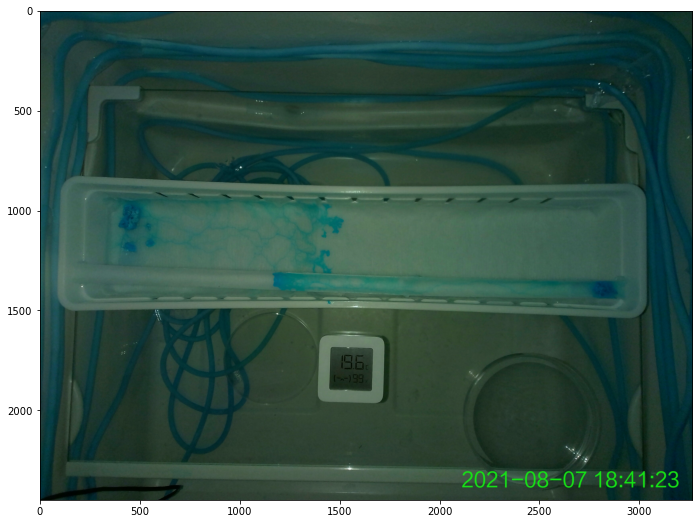

In [5]:
view(cv2.imread(f"{2000}.jpg"))

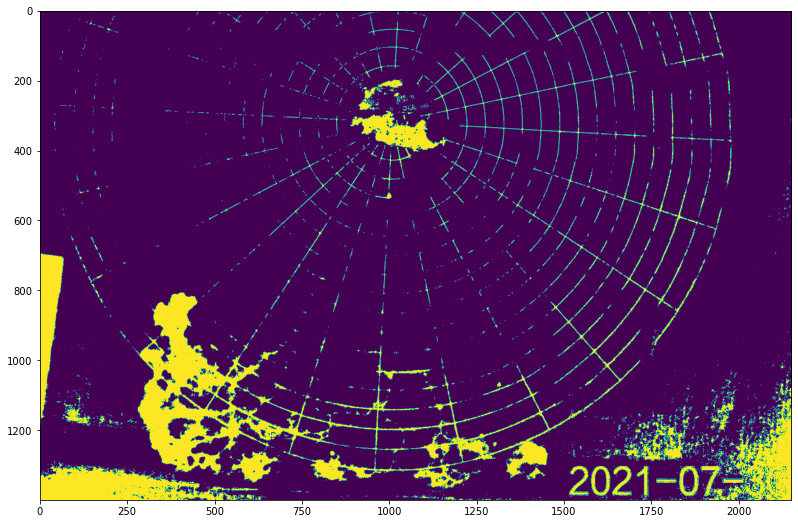

KeyboardInterrupt: Interrupted by user

In [72]:
for i in range(2000, 2500, 100):
    frame = cv2.imread(f"{i}.jpg")
    f = CutFrame_L(frame, 600, 2750)
    f = CutFrame_T(f, 1000, 2400)
    blu = f[:,:,0]
    view(blu <= 53)
    input()

#### Remember to test the range of Cutting Frames

In [19]:
print(os.getcwd())

/Users/yutianqin/Downloads/SchoolWork/slime-mold-main/frames/2021-07-31


(2448, 3264, 3)


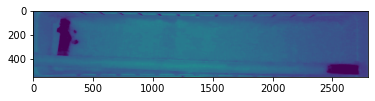

In [9]:
file = cv2.imread("0.jpg", 1)
print(file.shape)
f = CutFrame_L(file, 200, 3000)
f = CutFrame_T(f, 900, 1450)
plt.imshow(f)

In [9]:
# for i in range(500):
#     for j in range(125):
#         print(i, j, f[i][j])

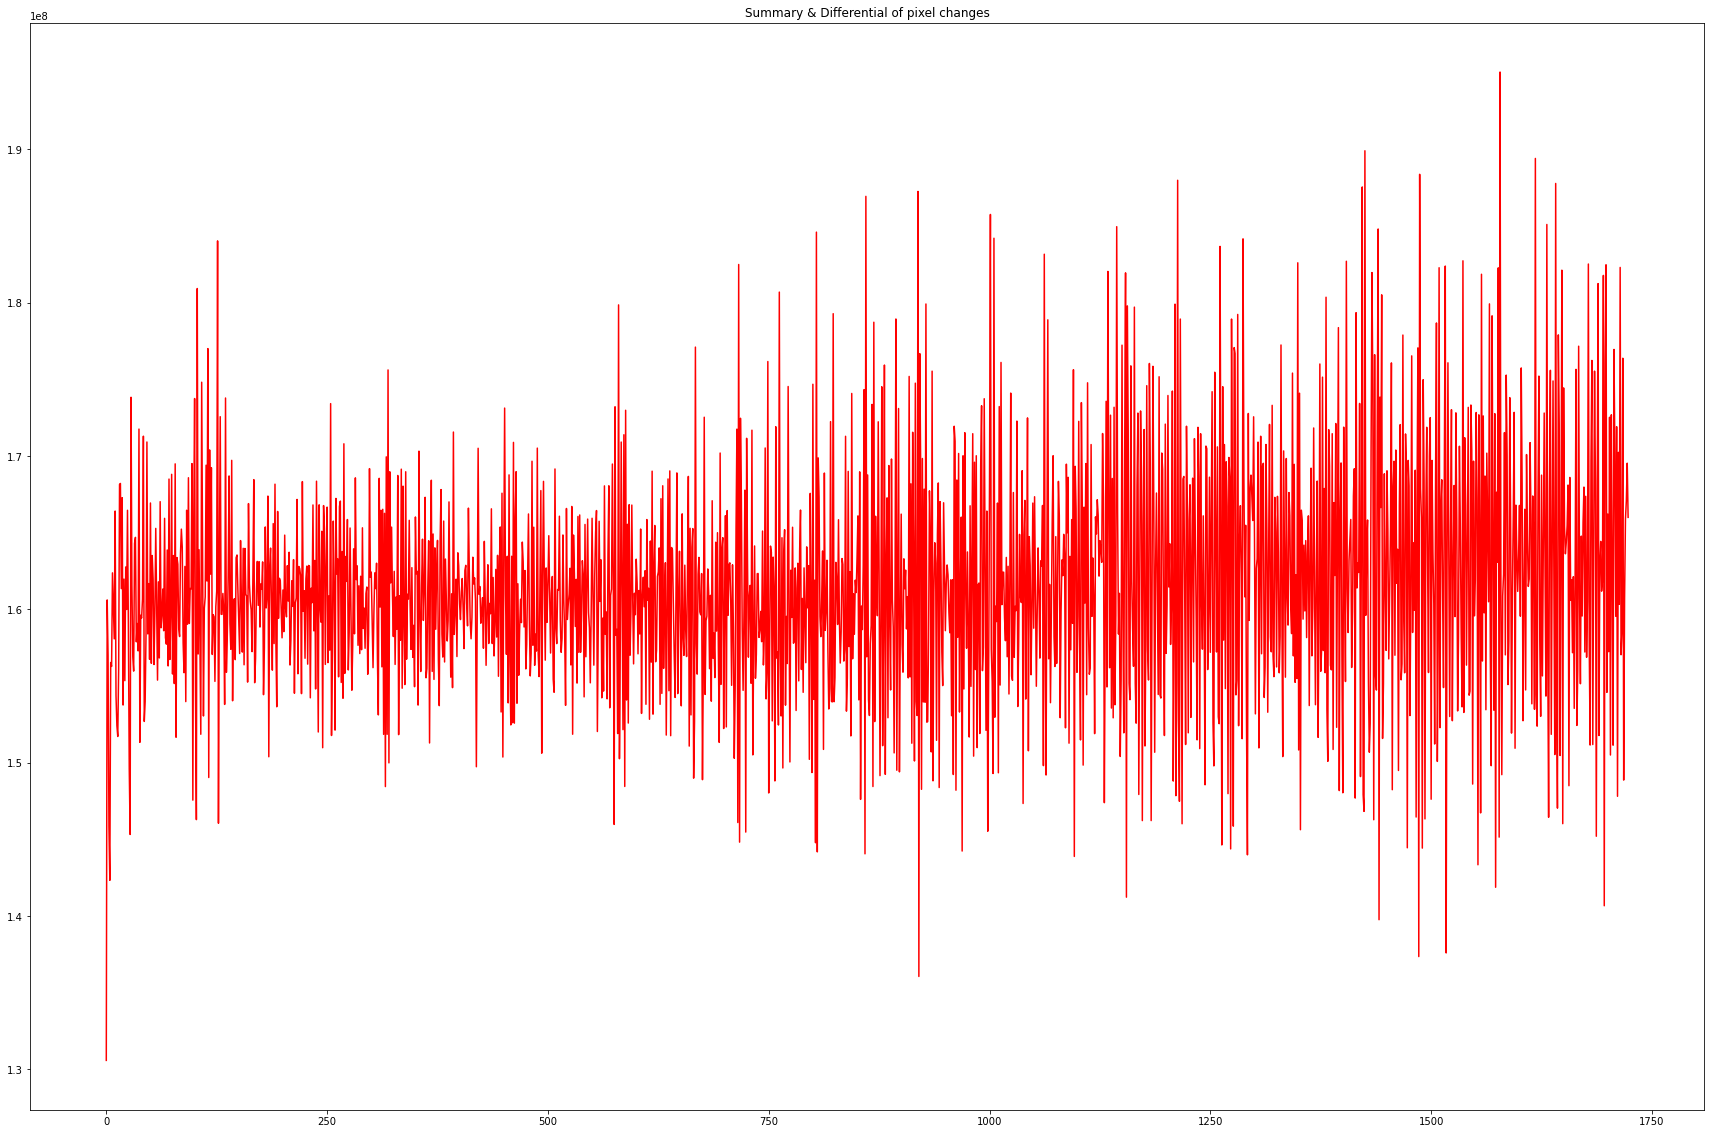

In [11]:
plt.figure(figsize=(30, 20))
plt.plot(diff, c='r')
plt.title('Summary & Differential of pixel changes')

plt.show()

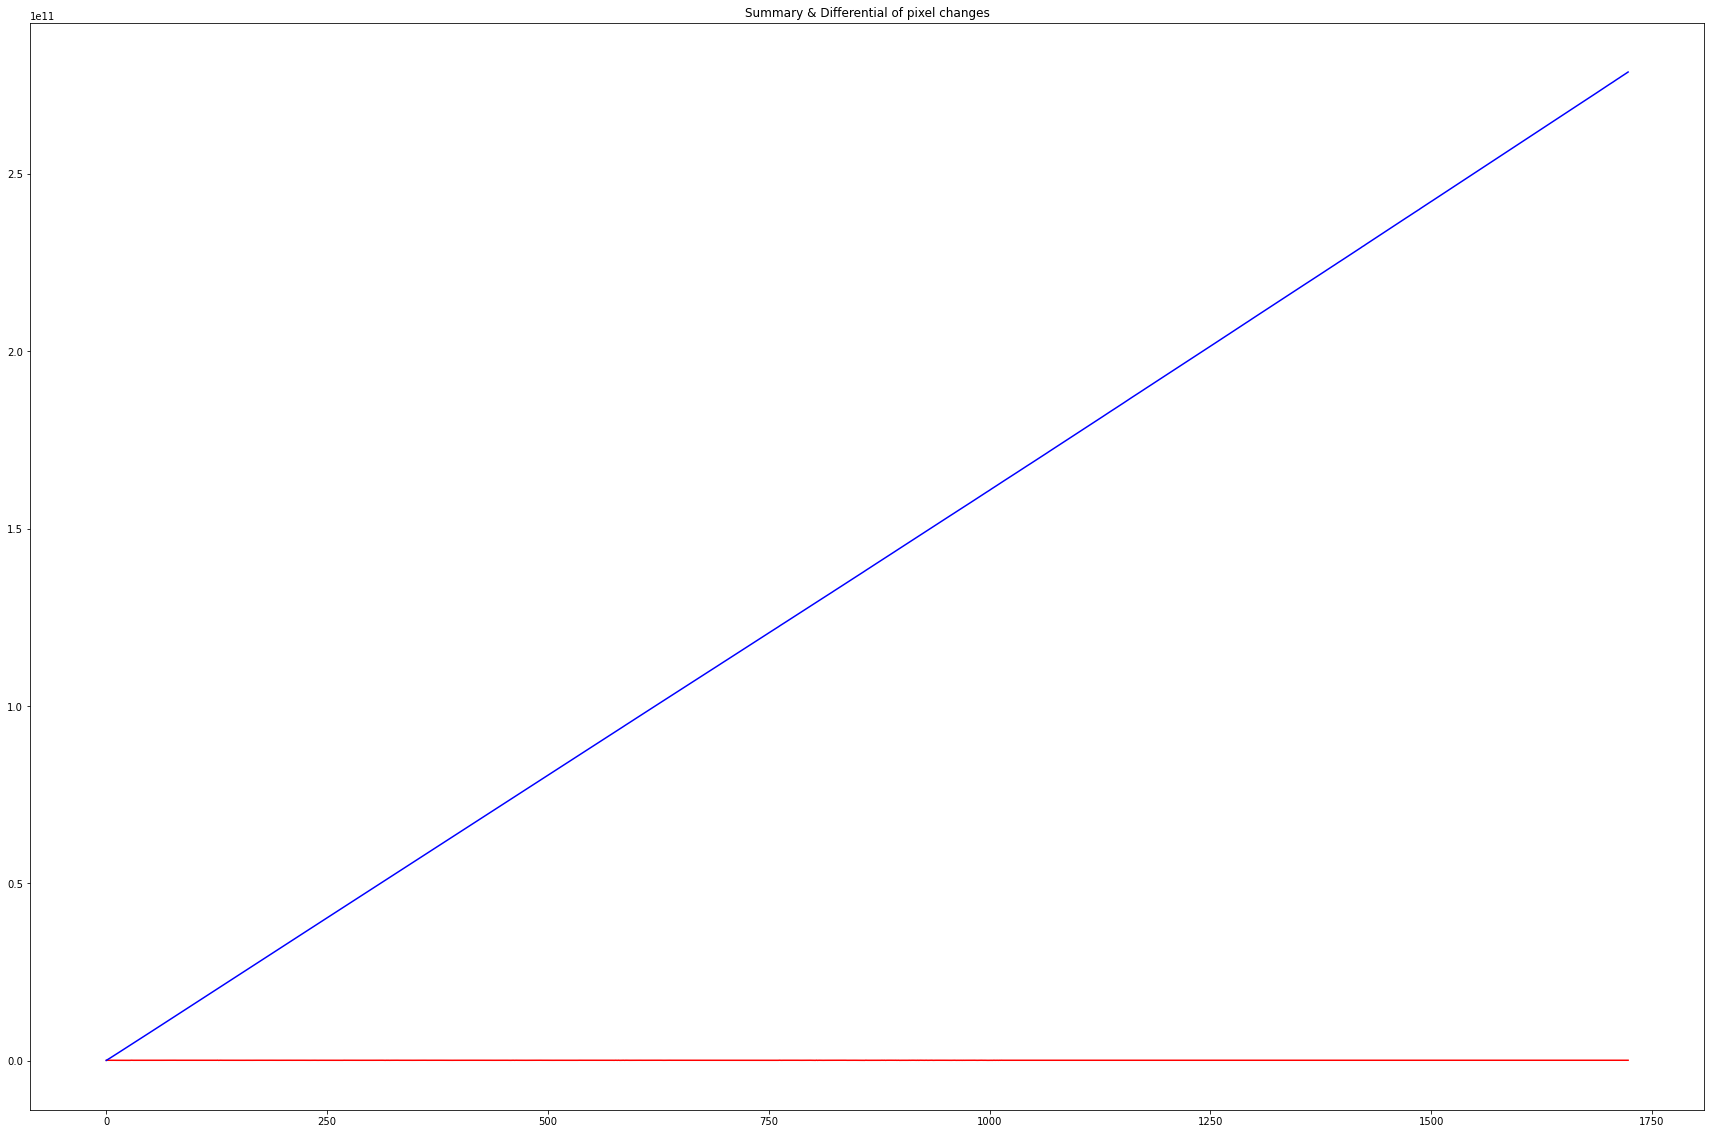

In [10]:
diff = []
overall_space = []
Difference(folder, 1, 200, 3000, 900, 1450, diff, overall_space)

plt.figure(figsize=(30, 20))
plt.plot(diff, c='r')
plt.plot(overall_space, c='b')
plt.title('Summary & Differential of pixel changes')

plt.show()

TypeError: stem() got an unexpected keyword argument 'c'

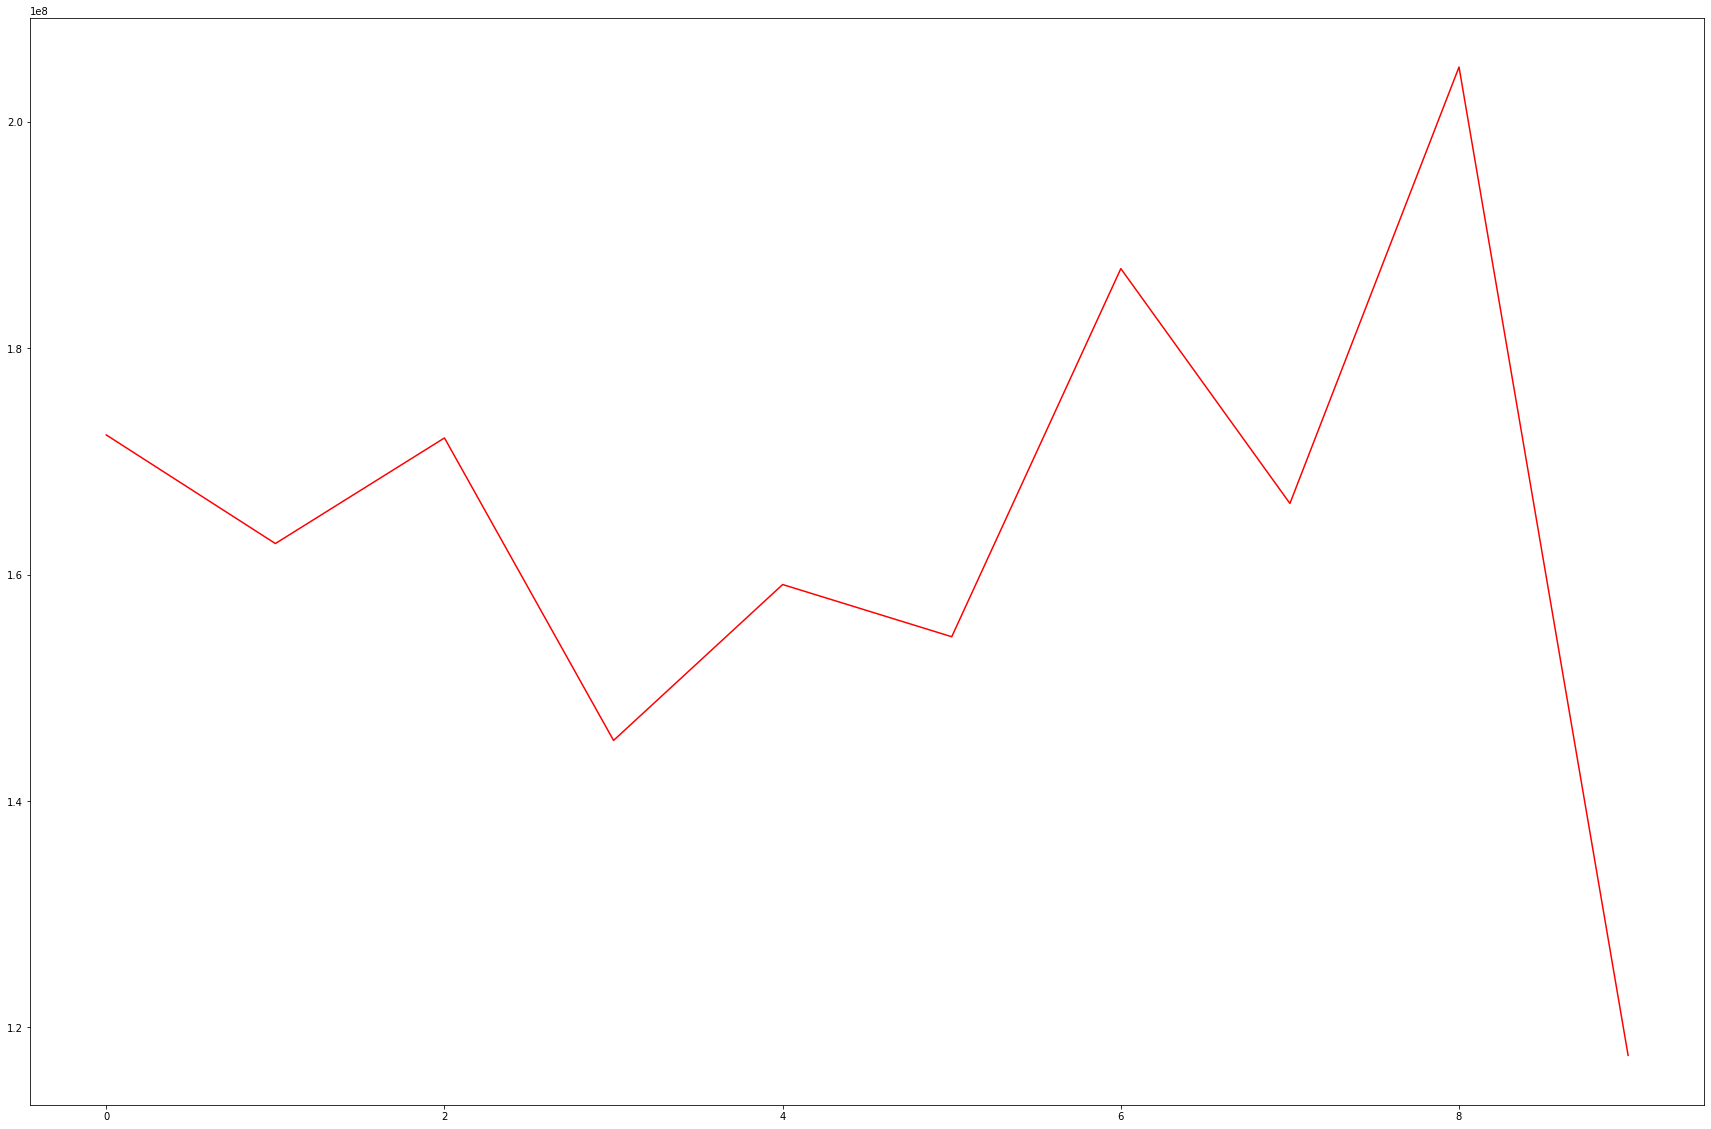

In [18]:
plt.figure(figsize=(30, 20))
plt.plot(diff[1000:1010], c='r')
plt.plot(overall_space[:10], c='b')
plt.title('Summary & Differential of pixel changes')

plt.show()

In [6]:
print("😭")

😭


ValueError: x and y must have same first dimension, but have shapes (410,) and (409,)

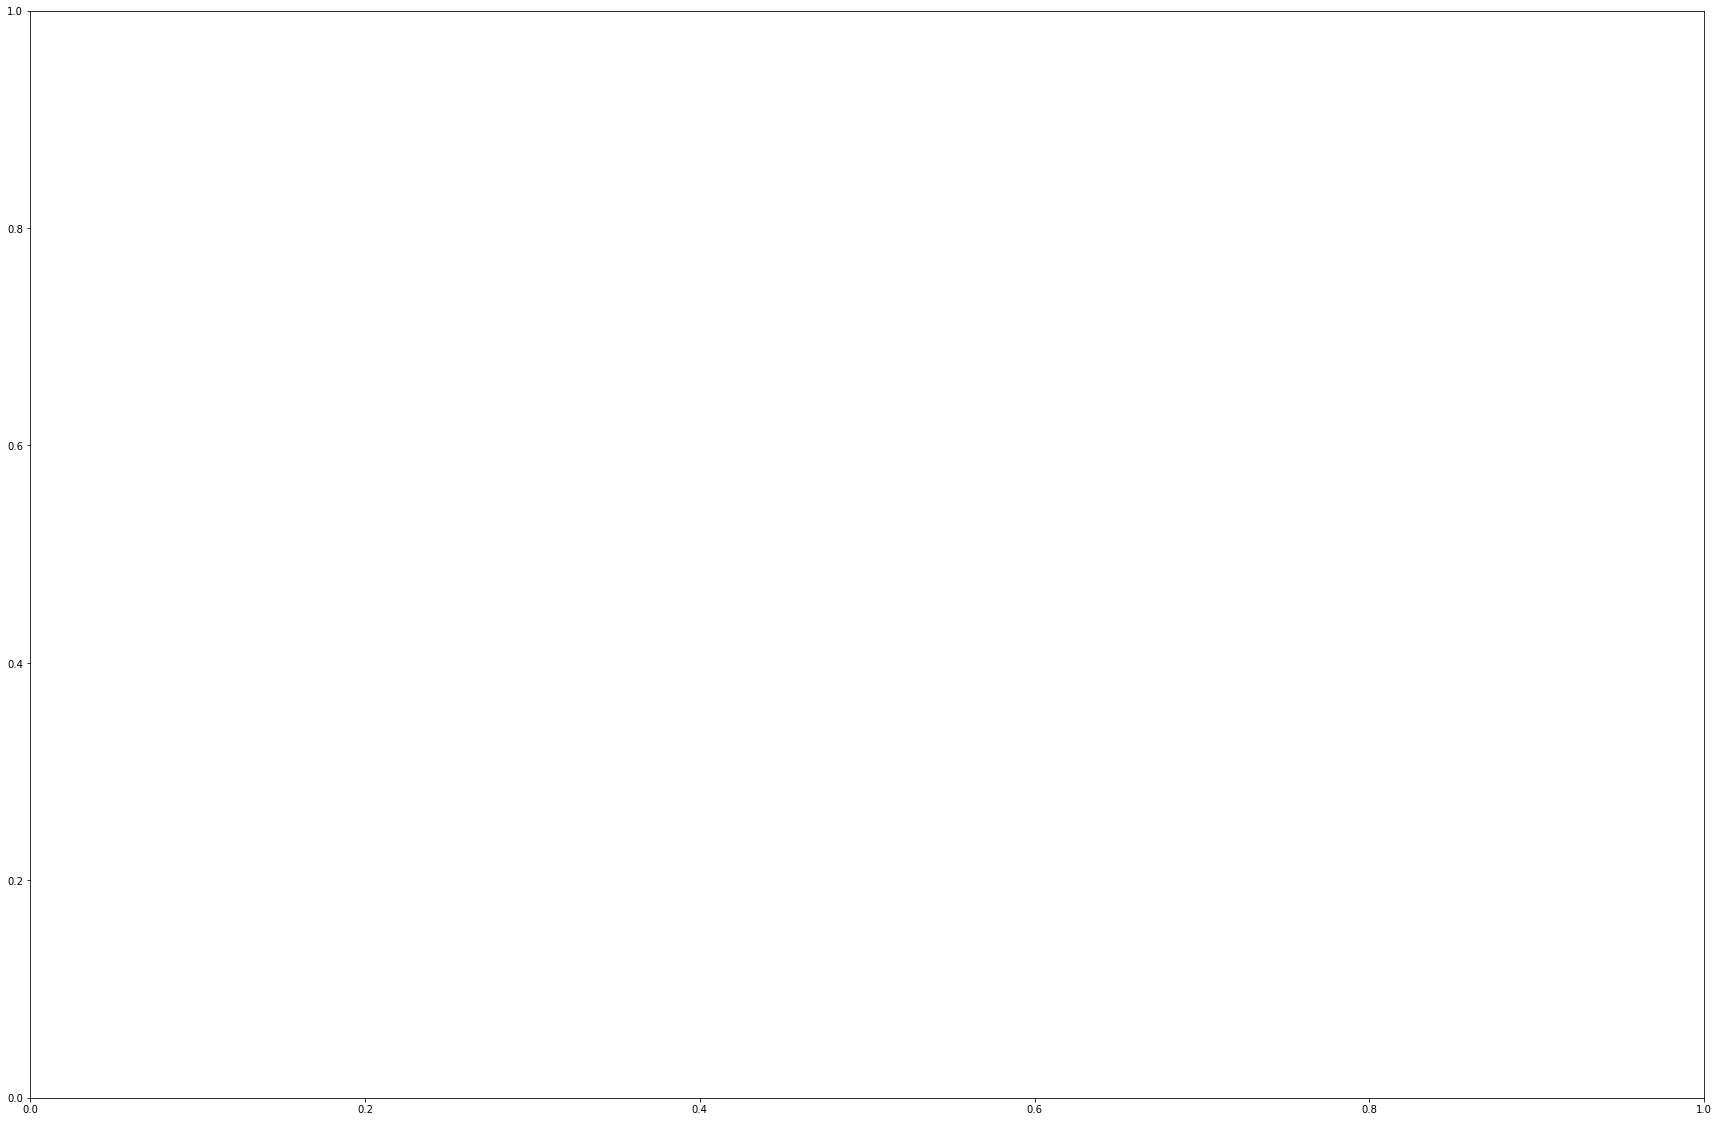

In [12]:
blue = []
velocity = []
five_min_velocity(files, 1, 200, 3000, 1000, 1550, blue, velocity)
        
time = np.linspace(0, int(n_frames/2), int(n_frames/10)) 

plt.figure(figsize=(30, 20))
plt.plot(blue, time)
plt.title('Five Minutes Velocity')
plt.show()

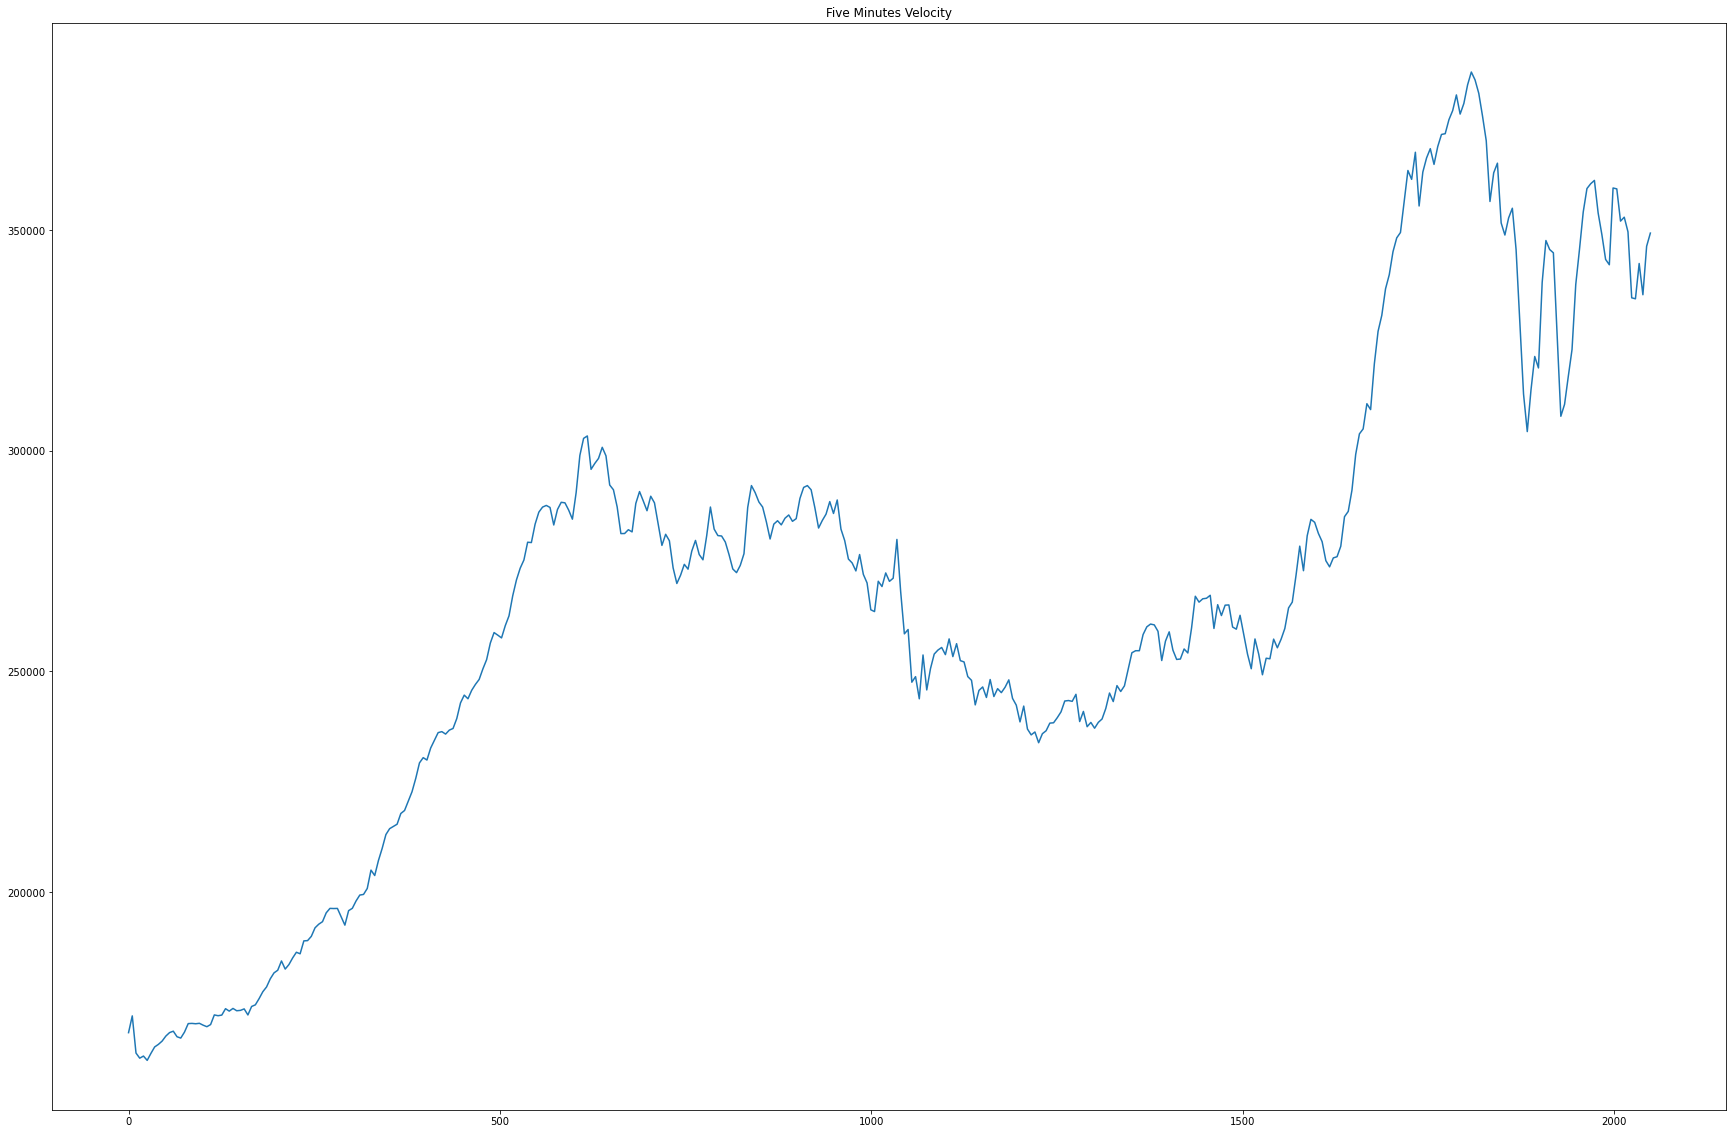

In [13]:

plt.figure(figsize=(30, 20))
plt.plot(time, blue[:-1])
plt.title('Five Minutes Velocity')
plt.show()

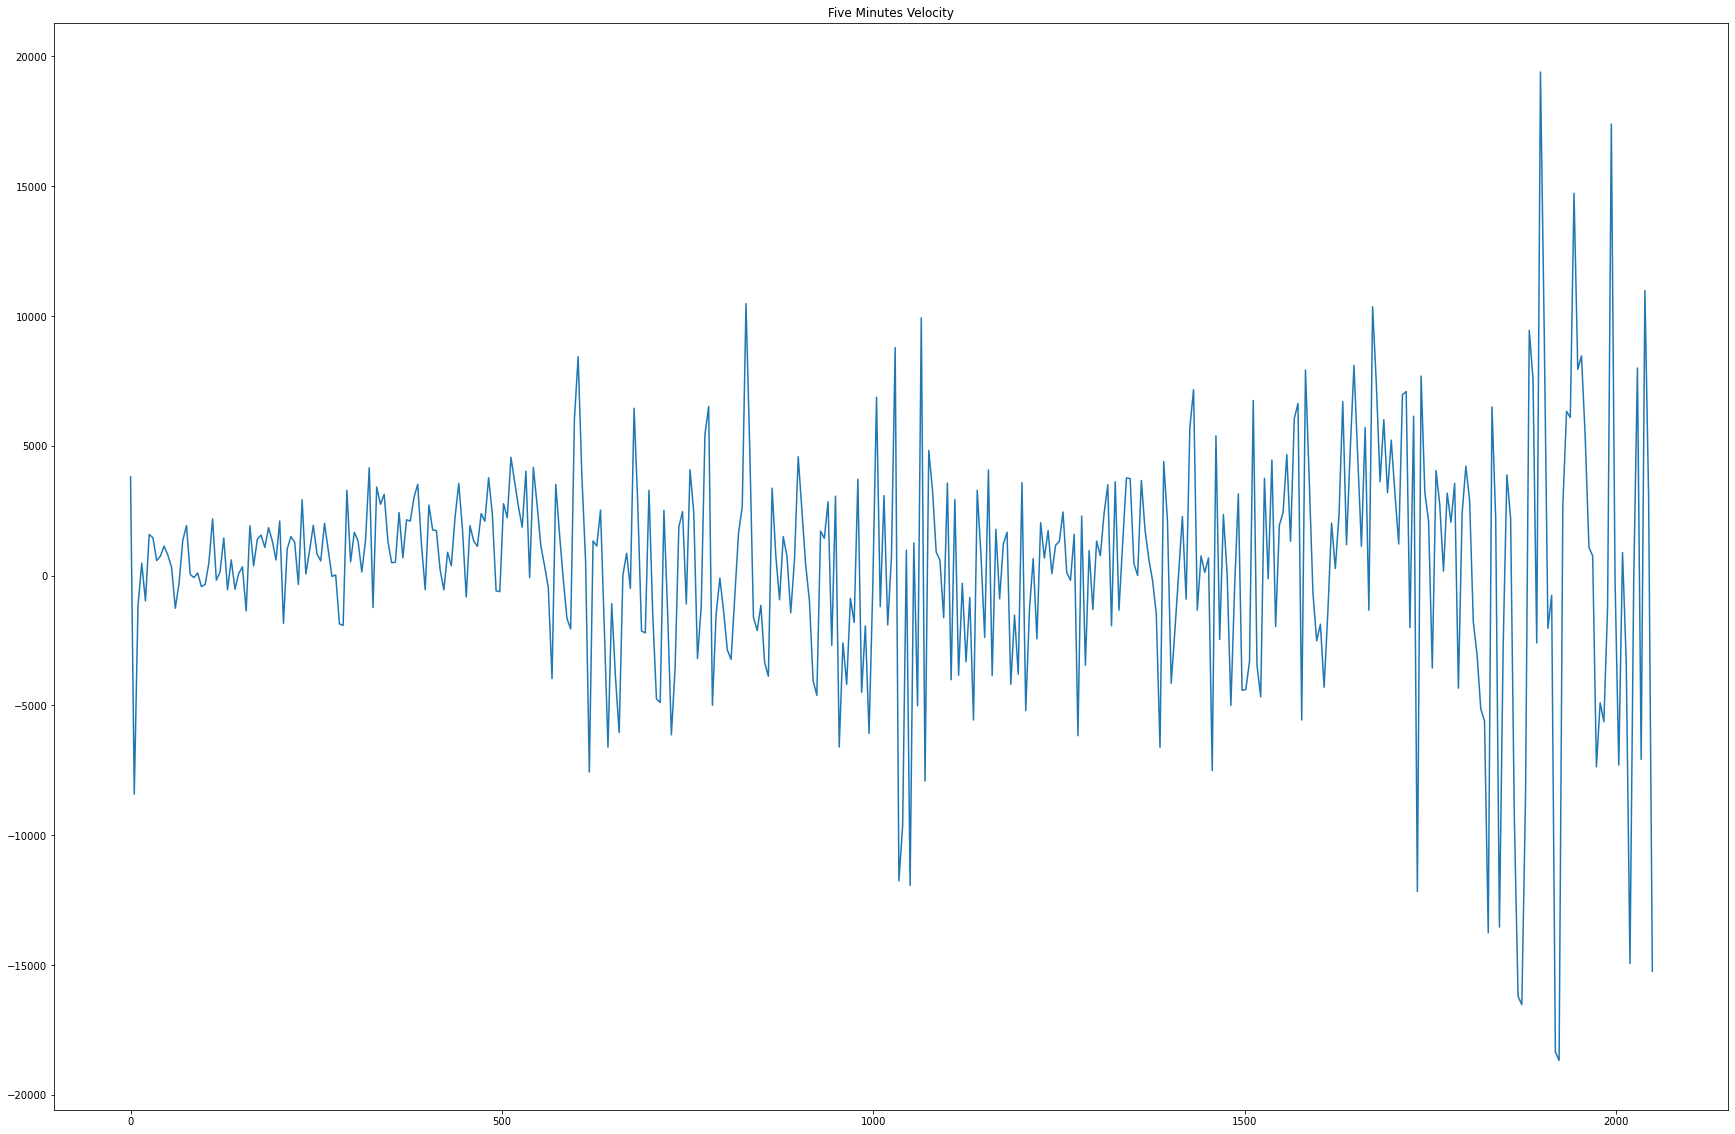

In [14]:
plt.figure(figsize=(30, 20))
plt.plot(time, velocity)
plt.title('Five Minutes Velocity')
plt.show()

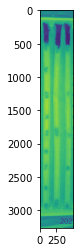

In [63]:
os.listdir(folder)
ff1 = cv2.imread(folder + '/591.jpg', 1)
ff1 = ff1[:, 1000:1500, 0]
plt.imshow(ff1)

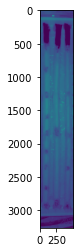

In [64]:

ff2 = cv2.imread(folder + '/592.jpg', 1)
ff2 = ff2[:, 1000:1500, 0]
plt.imshow(ff2)

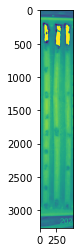

In [67]:
for i in range(3264):
    for j in range(500):
        if ff1[i][j]<=48: 
            ff1[i][j] = 255
plt.imshow(ff1)

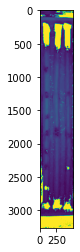

In [71]:
for i in range(3264):
    for j in range(500):
        if ff2[i][j]<=48: 
            ff2[i][j] = 255
plt.imshow(ff2)